In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:\\Users\\chris\\Downloads\\Menthal\\MH_Campaigns1723.csv')

In [3]:
df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (724756, 17)


,Date,ID,url,username,source,location,tweet,likes,rt,followers,replies,campaign,likes_pf,replies_pf,rt_pf,engagement,engagement_0
0,2023-02-15 13:48:52+00:00,1625854658601418753,https://twitter.com/haringeyiapt/status/162585...,haringeyiapt,Twitter for iPhone,Haringey,"People with OCD experience intensely negative,...",5,1,317,0,OCD,0.015773,0.000000,0.006309,0.022082,0.031546
1,2023-02-09 22:37:56+00:00,1623813475469344769,https://twitter.com/scrupulOCD_KC/status/16238...,scrupulOCD_KC,Twitter for Android,unknown,Hello all I'm Erika an @IOCDF grassroots advoc...,0,0,9,0,OCD,0.000000,0.000000,0.000000,0.000000,0.000000
2,2022-10-20 11:30:07+00:00,1583057973496406016,https://twitter.com/FootstepsCandC/status/1583...,FootstepsCandC,SmarterQueue,Gloucester,"In light of last week's OCD Awareness week, we...",0,0,905,0,OCD,0.000000,0.000000,0.000000,0.000000,0.000000
3,2022-10-18 19:42:14+00:00,1582457044451627008,https://twitter.com/IOCDF/status/1582457044451...,IOCDF,Twitter Web App,"Boston, MA",The GIFS now have over 1.4 million views on GI...,5,2,19257,0,OCD,0.000260,0.000000,0.000208,0.000467,0.000519
4,2022-10-18 19:42:13+00:00,1582457038969262080,https://twitter.com/IOCDF/status/1582457038969...,IOCDF,Twitter Web App,"Boston, MA","The 2022 #OCDweek events, activities, and live...",7,2,19257,1,OCD,0.000364,0.000156,0.000208,0.000727,0.000779


In [4]:
df.isnull().sum()

Date            0
ID              0
url             0
username        0
source          0
location        0
tweet           0
likes           0
rt              0
followers       0
replies         0
campaign        0
likes_pf        0
replies_pf      0
rt_pf           0
engagement      0
engagement_0    0
dtype: int64

In [5]:
import pandas as pd
import datetime
import re

In [6]:
# Preprocess the Date column
df["Date"] = pd.to_datetime(df["Date"]).dt.date# Preprocess the Date column

In [7]:
df['Date'] = df['Date'].astype('datetime64[s]')
datetime_index = pd.DatetimeIndex(df['Date'])
df['WEEK_OF_YEAR'] = datetime_index.weekofyear - 1
df['DAY_OF_WEEK'] = datetime_index.dayofweek
df['MONTH_OF_YEAR'] = df['Date'].dt.month
df['QUARTER_HOUR'] = datetime_index.hour * 4 + datetime_index.minute // 15

C:\Users\chris\AppData\Local\Temp\ipykernel_5524\2387702192.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['WEEK_OF_YEAR'] = datetime_index.weekofyear - 1


In [8]:
df.head()

,Date,ID,url,username,source,location,tweet,likes,rt,followers,...,campaign,likes_pf,replies_pf,rt_pf,engagement,engagement_0,WEEK_OF_YEAR,DAY_OF_WEEK,MONTH_OF_YEAR,QUARTER_HOUR
0,2023-02-15,1625854658601418753,https://twitter.com/haringeyiapt/status/162585...,haringeyiapt,Twitter for iPhone,Haringey,"People with OCD experience intensely negative,...",5,1,317,...,OCD,0.015773,0.000000,0.006309,0.022082,0.031546,6,2,2,0
1,2023-02-09,1623813475469344769,https://twitter.com/scrupulOCD_KC/status/16238...,scrupulOCD_KC,Twitter for Android,unknown,Hello all I'm Erika an @IOCDF grassroots advoc...,0,0,9,...,OCD,0.000000,0.000000,0.000000,0.000000,0.000000,5,3,2,0
2,2022-10-20,1583057973496406016,https://twitter.com/FootstepsCandC/status/1583...,FootstepsCandC,SmarterQueue,Gloucester,"In light of last week's OCD Awareness week, we...",0,0,905,...,OCD,0.000000,0.000000,0.000000,0.000000,0.000000,41,3,10,0
3,2022-10-18,1582457044451627008,https://twitter.com/IOCDF/status/1582457044451...,IOCDF,Twitter Web App,"Boston, MA",The GIFS now have over 1.4 million views on GI...,5,2,19257,...,OCD,0.000260,0.000000,0.000208,0.000467,0.000519,41,1,10,0
4,2022-10-18,1582457038969262080,https://twitter.com/IOCDF/status/1582457038969...,IOCDF,Twitter Web App,"Boston, MA","The 2022 #OCDweek events, activities, and live...",7,2,19257,...,OCD,0.000364,0.000156,0.000208,0.000727,0.000779,41,1,10,0


In [9]:
import nltk

In [10]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Create an instance of the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each tweet
sentiments = []
for tweet in df["tweet"]:
    sentiment_score = sia.polarity_scores(tweet)
    sentiment = "Positive" if sentiment_score["compound"] > 0 else "Negative" if sentiment_score["compound"] < 0 else "Neutral"
    sentiments.append(sentiment)

#df['sentiment'] = df['tweet'].apply(lambda tweet: sia.polarity_scores(tweet))
# Add the sentiments to the DataFrame
df["sentiment"] = sentiments


In [12]:
# Display the DataFrame with the added sentiment 
df.head()

,Date,ID,url,username,source,location,tweet,likes,rt,followers,...,likes_pf,replies_pf,rt_pf,engagement,engagement_0,WEEK_OF_YEAR,DAY_OF_WEEK,MONTH_OF_YEAR,QUARTER_HOUR,sentiment
0,2023-02-15,1625854658601418753,https://twitter.com/haringeyiapt/status/162585...,haringeyiapt,Twitter for iPhone,Haringey,"People with OCD experience intensely negative,...",5,1,317,...,0.015773,0.000000,0.006309,0.022082,0.031546,6,2,2,0,Negative
1,2023-02-09,1623813475469344769,https://twitter.com/scrupulOCD_KC/status/16238...,scrupulOCD_KC,Twitter for Android,unknown,Hello all I'm Erika an @IOCDF grassroots advoc...,0,0,9,...,0.000000,0.000000,0.000000,0.000000,0.000000,5,3,2,0,Positive
2,2022-10-20,1583057973496406016,https://twitter.com/FootstepsCandC/status/1583...,FootstepsCandC,SmarterQueue,Gloucester,"In light of last week's OCD Awareness week, we...",0,0,905,...,0.000000,0.000000,0.000000,0.000000,0.000000,41,3,10,0,Positive
3,2022-10-18,1582457044451627008,https://twitter.com/IOCDF/status/1582457044451...,IOCDF,Twitter Web App,"Boston, MA",The GIFS now have over 1.4 million views on GI...,5,2,19257,...,0.000260,0.000000,0.000208,0.000467,0.000519,41,1,10,0,Positive
4,2022-10-18,1582457038969262080,https://twitter.com/IOCDF/status/1582457038969...,IOCDF,Twitter Web App,"Boston, MA","The 2022 #OCDweek events, activities, and live...",7,2,19257,...,0.000364,0.000156,0.000208,0.000727,0.000779,41,1,10,0,Positive


In [13]:
df.drop(['ID', 'url', 'username', 'source','location','likes','rt','followers', 'likes_pf','replies_pf', 'rt_pf', 'engagement','engagement_0' ], axis=1, inplace=True)

In [14]:
df.head()

,Date,tweet,replies,campaign,WEEK_OF_YEAR,DAY_OF_WEEK,MONTH_OF_YEAR,QUARTER_HOUR,sentiment
0,2023-02-15,"People with OCD experience intensely negative,...",0,OCD,6,2,2,0,Negative
1,2023-02-09,Hello all I'm Erika an @IOCDF grassroots advoc...,0,OCD,5,3,2,0,Positive
2,2022-10-20,"In light of last week's OCD Awareness week, we...",0,OCD,41,3,10,0,Positive
3,2022-10-18,The GIFS now have over 1.4 million views on GI...,0,OCD,41,1,10,0,Positive
4,2022-10-18,"The 2022 #OCDweek events, activities, and live...",1,OCD,41,1,10,0,Positive


In [15]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from matplotlib.ticker import  MultipleLocator, FormatStrFormatter
import pandas as pd 
import os
import re
import math
import ast

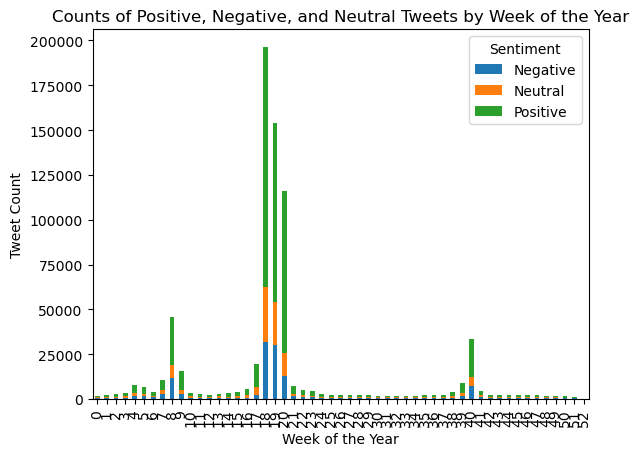

In [16]:
sentiment_counts = df.groupby(['WEEK_OF_YEAR', 'sentiment']).size().unstack(fill_value=0)

# Plot the sentiment counts
sentiment_counts.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Week of the Year')
plt.ylabel('Tweet Count')
plt.title('Counts of Positive, Negative, and Neutral Tweets by Week of the Year')
plt.legend(title='Sentiment')

# Show the plot
plt.show()

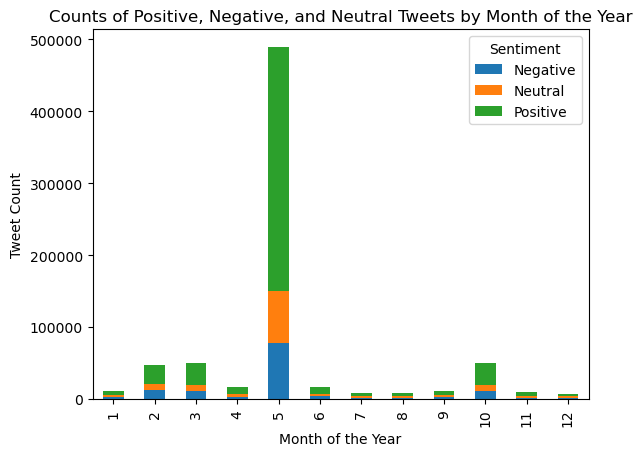

In [17]:
sentiment_counts = df.groupby(['MONTH_OF_YEAR', 'sentiment']).size().unstack(fill_value=0)

# Plot the sentiment counts
sentiment_counts.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Month of the Year')
plt.ylabel('Tweet Count')
plt.title('Counts of Positive, Negative, and Neutral Tweets by Month of the Year')
plt.legend(title='Sentiment')

# Show the pl

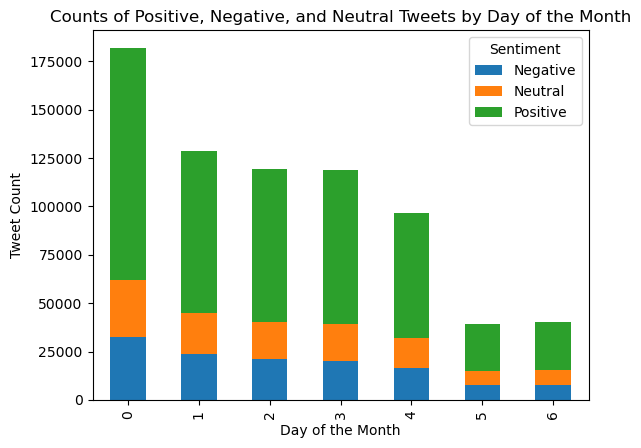

In [18]:
#DataFrame named 'data' with the columns 'sentiment' and 'DAY_OF_MONTH'
sentiment_counts = df.groupby(['DAY_OF_WEEK', 'sentiment']).size().unstack(fill_value=0)

# Plot the sentiment counts
sentiment_counts.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Day of the Month')
plt.ylabel('Tweet Count')
plt.title('Counts of Positive, Negative, and Neutral Tweets by Day of the Month')
plt.legend(title='Sentiment')

# Show the plot
plt.show()

In [19]:
df.set_index('Date', inplace=True)

In [20]:
df.head()

,tweet,replies,campaign,WEEK_OF_YEAR,DAY_OF_WEEK,MONTH_OF_YEAR,QUARTER_HOUR,sentiment
Date,,,,,,,,
2023-02-15,"People with OCD experience intensely negative,...",0,OCD,6,2,2,0,Negative
2023-02-09,Hello all I'm Erika an @IOCDF grassroots advoc...,0,OCD,5,3,2,0,Positive
2022-10-20,"In light of last week's OCD Awareness week, we...",0,OCD,41,3,10,0,Positive
2022-10-18,The GIFS now have over 1.4 million views on GI...,0,OCD,41,1,10,0,Positive
2022-10-18,"The 2022 #OCDweek events, activities, and live...",1,OCD,41,1,10,0,Positive


In [21]:
# Filter the data based on the desired date range
filtered_data = df[(df.index.year >= 2022) & (df.index.year <= 2023)]

# Group the filtered data by 3-month intervals and aggregate the columns
resampled_data = filtered_data.groupby(pd.Grouper(freq='3M')).agg({
    'tweet': 'count',
    'sentiment': lambda x: x.value_counts()
}).reset_index()

# Expand the sentiment column into separate columns
sentiment_counts = resampled_data['sentiment'].apply(pd.Series)
sentiment_counts.columns = ['Positive', 'Negative', 'Neutral']

# Concatenate the sentiment counts with the resampled_data DataFrame
resampled_data = pd.concat([resampled_data['Date'], sentiment_counts], axis=1)

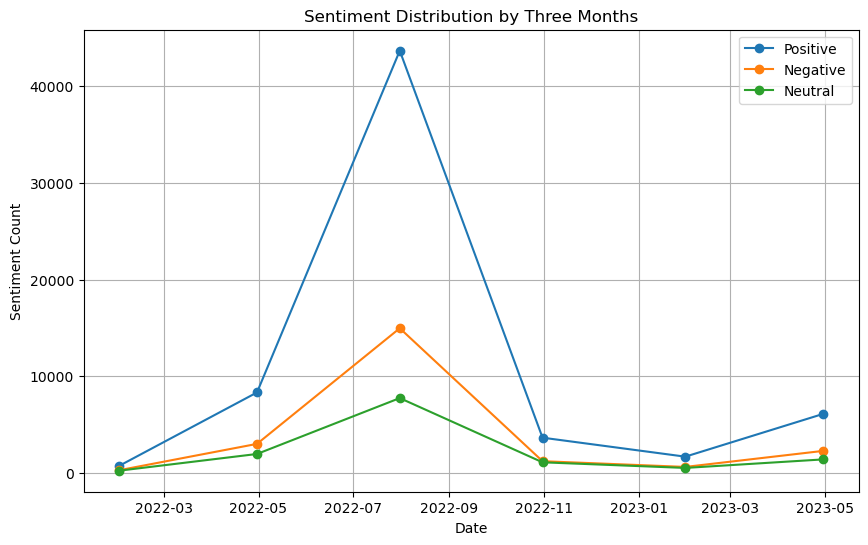

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(resampled_data['Date'], resampled_data['Positive'], marker='o', label='Positive')
plt.plot(resampled_data['Date'], resampled_data['Negative'], marker='o', label='Negative')
plt.plot(resampled_data['Date'], resampled_data['Neutral'], marker='o', label='Neutral')
plt.xlabel('Date')
plt.ylabel('Sentiment Count')
plt.title('Sentiment Distribution by Three Months')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
import re 
from wordcloud import WordCloud
from nltk.corpus import stopwords as nltk_stopwords

In [24]:
filtered_data = df[(df.index.year >= 2022) & (df.index.year <= 2023)]
stopwords_set = set(nltk_stopwords.words('english'))

In [25]:
# Function to preprocess the tweet text
def preprocess_tweet_text(tweet):
    # Remove hyperlinks
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet)
    
    # Remove hashtags, usernames, and special characters
    tweet = re.sub(r'#\w+|\@\w+|\W', ' ', tweet)
    
    # Convert to lowercase
    tweet = tweet.lower()
    
    return tweet

In [26]:
# Apply preprocessing to the tweet column
filtered_data['clean_tweet'] = filtered_data['tweet'].apply(preprocess_tweet_text)

C:\Users\chris\AppData\Local\Temp\ipykernel_5524\2825673879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['clean_tweet'] = filtered_data['tweet'].apply(preprocess_tweet_text)


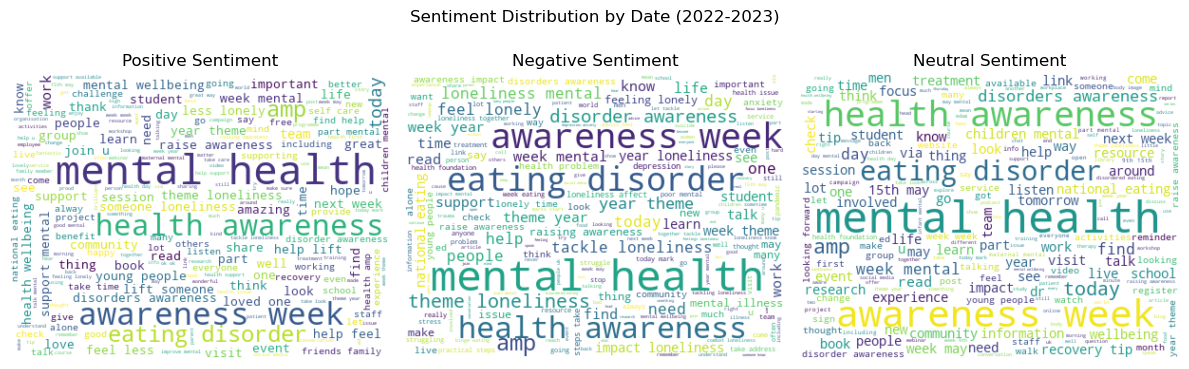

In [27]:
# Create a word cloud for each sentiment category
sentiments = ['Positive', 'Negative', 'Neutral']
fig, axes = plt.subplots(1, len(sentiments), figsize=(12, 4))

for i, sentiment in enumerate(sentiments):
    # Concatenate the cleaned text data for the specific sentiment category
    sentiment_tweets = ' '.join(filtered_data[filtered_data['sentiment'] == sentiment]['clean_tweet'])
    
    # Remove stopwords
    sentiment_tweets = ' '.join([word for word in sentiment_tweets.split() if word not in stopwords_set])
    
    # Generate the word cloud for the sentiment category
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate(sentiment_tweets)
    
    # Display the word cloud in the corresponding subplot
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(sentiment + ' Sentiment')
    axes[i].axis('off')

plt.suptitle('Sentiment Distribution by Date (2022-2023)')
plt.tight_layout()
plt.show()

# DASHBOARD